<a href="https://colab.research.google.com/github/alpellario/911-Call-Demand-and-Time-Analysis/blob/main/%5BEN%5D_Temporal_Analysis_of_911_Emergency_Calls_Understanding_Demand_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
<td></td><td></td>
<td>
<img src="https://drive.google.com/uc?id=1Dp8It7cn7Mk4LvYMRib_3CaXFQfXS7ya" width="200" height="200" />
</td>
<td></td>
<td style="padding-left:40px;">

# <strong>SERKAN KAAN KUHEYLAN</strong><br>
## <a href="https://github.com/alpellario?tab=repositories" target=”_blank”>Visit my GitHub repositories</a><br>
## <a href="https://www.linkedin.com/in/serkan-kaan-k%C3%BCheylan-a482b3180/" target=”_blank”>Visit my LinkedIn account</a>
## <a href="https://serkankaankuheylan.com/" target=”_blank”>Visit my Website</a>
</td>
</tr>
</table>


# Temporal Analysis of Emergency (911) Calls: Understanding Demand Dynamics

### **In this notebook, I have undertaken an in-depth analysis of 911 call data sourced from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The objective was to uncover insights and understand the patterns within emergency call data through data-driven methodologies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('911.csv')

### **The dataset comprises 99,492 entries across 9 columns, all columns are almost fully populated, there are some missing values in 'zip', 'twp', and 'addr'. The 'timeStamp' field is of object type, likely stored as a string, which may need to convert to a dateTime type later on.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df['e'].unique()

array([1])

### **The 'e' column in the dataset contains only the repetitive value of 1, indicating it holds no informative value. Therefore, I am removing this column.**

In [ ]:
df.drop('e', axis=1, inplace=True)

**Exploring Data**

In [ ]:
sns.set_style('whitegrid')

### **I will identify the top 5 zip codes with the highest number of 911 calls and present this information in an easily readable table and graph.**

In [ ]:
topFiveZip = df['zip'].value_counts().sort_values(ascending=False).head(5)

df_zip = pd.DataFrame({'Zip Code':topFiveZip.index,'count':topFiveZip.values})

df_zip

,Zip Code,count
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174


Text(0, 0.5, 'Number of 911 Calls')

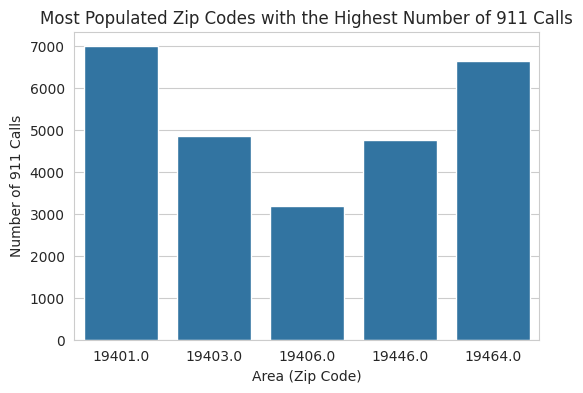

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Zip Code', y='count', data=df_zip.head())
plt.title('Most Populated Zip Codes with the Highest Number of 911 Calls')
plt.xlabel('Area (Zip Code)')
plt.ylabel('Number of 911 Calls')

### **I will identify the top 5 township with the highest number of 911 calls and present this information in an easily readable table and graph.**

In [ ]:
top5town = df['twp'].value_counts().sort_values(ascending=False).head(5)

df_town = pd.DataFrame({'Township':top5town.index,'count':top5town.values})

df_town

,Township,count
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575


Text(0, 0.5, 'Number of 911 Calls')

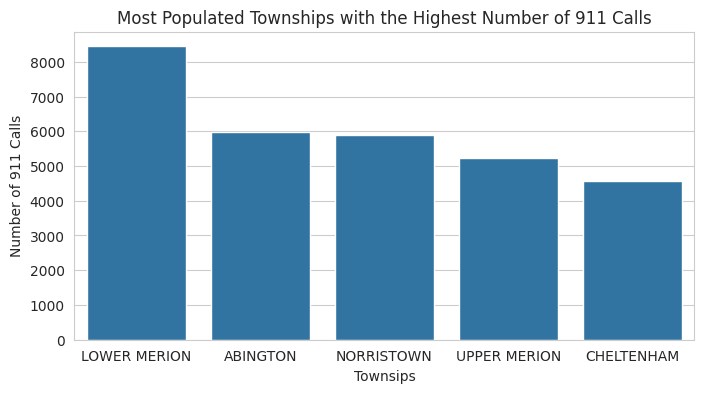

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Township', y='count', data=df_town)
plt.title('Most Populated Townships with the Highest Number of 911 Calls')
plt.xlabel('Townsips')
plt.ylabel('Number of 911 Calls')

## **Creating new features**

### **When examining the dataset, I noticed that the reasons for calling 911 are grouped under titles such as "EMS: BACK PAINS/INJURY", "EMS: DIABETIC EMERGENCY" in a Reasons/Departments format. I plan to remove the Departments part and create a new column named Reasons, which will allow for more meaningful grouping and analysis of the data.**

In [ ]:
print(f'Number of unique titles: {df["title"].nunique()}')

Number of unique titles: 110


In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [ ]:
print(f'Unique call reasons : {df["Reason"].unique()}')

Unique call reasons : ['EMS' 'Fire' 'Traffic']


### **We consolidated the 110 distinct reasons into 3 categories, grouping similar reasons under each category like 'EMS', 'Fire', 'Traffic'.Now let's interpret this information**

In [ ]:
reason_table = df['Reason'].value_counts()
pd.DataFrame({'Reason': reason_table.index, 'Count': reason_table.values })

,Reason,Count
0,EMS,48877
1,Traffic,35695
2,Fire,14920


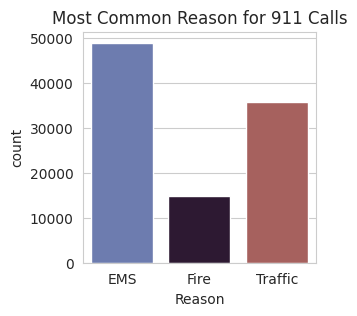

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,3))
sns.countplot(x='Reason', data=df, hue='Reason', palette='twilight')
plt.title('Most Common Reason for 911 Calls')
plt.xlabel('Reason')
plt.show()


### **The data clearly indicates that EMS (Emergency Medical Services) emergencies are the leading cause of 911 calls with 48,877 incidents, followed by traffic incidents at 35,695, and fire emergencies being the least common at 14,920.**

___
### **Now, I will focus on the timestamp information. As I mentioned at the beginning of the notebook, the `timeStamp` data is assigned as a string. We cannot utilize this crucial information while it's in string format. Therefore, I will convert this data to the datetime type.**

In [ ]:
print(f'timeStamp data type : {type(df["timeStamp"].iloc[0])}')

timeStamp data type : <class 'str'>


In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
print(f'timeStamp data type : {type(df["timeStamp"].iloc[0])}')

timeStamp data type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### **Now, I will extract Hour, Month, and Day of Week information from the `timeStamp` data, creating separate columns for each. This will allow us to freely examine and group the 911 calls based on each of these time dimensions.**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_of_week)

### **The Day of Week data is created as index types ranging from 0 to 6. To make this more interpretable, I will create a dictionary and map it to the short names of the days of the week.**

In [ ]:
dname = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dname)

In [ ]:
print(f'Day of Week : {df["Day of Week"].unique()}')

Day of Week : ['Thu' 'Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed']


[]

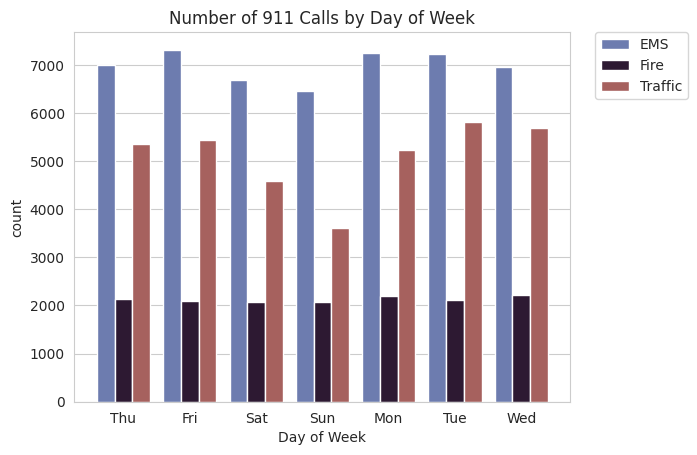

In [ ]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='twilight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(f'Number of 911 Calls by Day of Week')
plt.plot()

### **This bar chart presents the count of emergency calls for three different services: EMS (Emergency Medical Services), Fire, and Traffic, categorized by the days of the week (Thursday through Wednesday). Here are some observations that can be made from the chart:**


### 1.   **EMS Calls:** EMS calls are the most frequent on all days, with the highest counts appearing on Tuesdays and the lowest on Sundays.

### 2.   **Fire Calls:** Fire-related calls are consistently the least frequent across all days. There does not appear to be a significant fluctuation throughout the week.

### 3.   **Traffic Calls:** Traffic-related calls show a noticeable dip on Sundays, which could be attributed to reduced traffic volumes on that day. The calls then increase on Monday, likely due to higher traffic as people return to work, and remain relatively high through Wednesday.



### **Weekday vs. Weekend Trends: All types of calls tend to be lower on weekends (Saturday and Sunday), with an uptick on Mondays. This could reflect the patterns of human activity typical of a standard workweek.**

### **Now do the same for Month:**

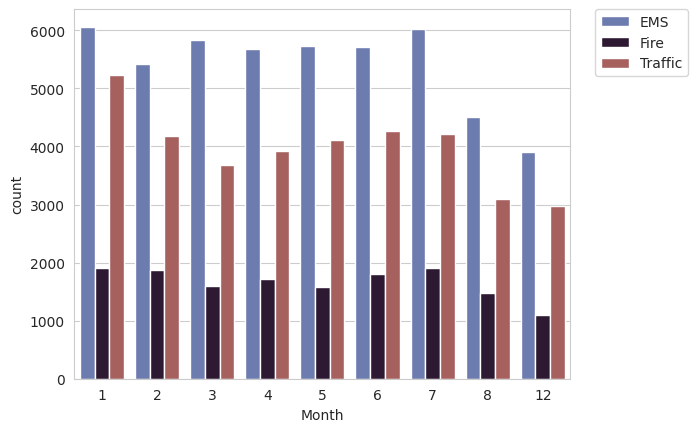

In [ ]:
sns.countplot(x='Month', data=df, hue='Reason', palette='twilight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### This bar chart represents the monthly distribution of emergency calls for EMS (Emergency Medical Services), Fire, and Traffic incidents over various months (1 through 8 and 12, representing January through August and December). Here are some key observations:

### 1. **EMS Calls**: Calls for EMS are consistently the highest each month compared to Fire and Traffic. There is a notable peak in January and a significant dip in August.

### 2. **Fire Calls**: The number of fire-related calls shows less variability compared to EMS and Traffic. The counts remain relatively lower and do not show any distinct peaks or drops, suggesting that the frequency of fire incidents does not fluctuate drastically with the seasons.

### 3. **Traffic Calls**: Traffic-related calls are higher in the earlier months, especially in March, and show a decrease as the year progresses, with the lowest point in August. This could be related to seasonal changes, where winter and spring months might see more traffic incidents due to weather conditions.

### 4. **Seasonal Trends**: There appears to be a general trend of higher emergency calls in the winter months, particularly for EMS and Traffic, which may be correlated with winter-related incidents. The decrease in calls during the summer months could be attributed to better weather conditions, potentially leading to fewer accidents and health emergencies.

### 5. **December Observation**: There is a noticeable increase in EMS calls in December, which might be related to the holiday season, where the incidence of health emergencies could increase.

### **It is important to consider that the data for some months (September through November) is missing, and therefore, the observations do not account for any trends during that period. **

_____
### **As you can see in the graph, data for the 9th, 10th, and 11th months are missing. I will attempt to interpolate this information using a simple line graph. I'll group the data by the Month column and plot the line graph accordingly.**


In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


<Axes: xlabel='Month'>

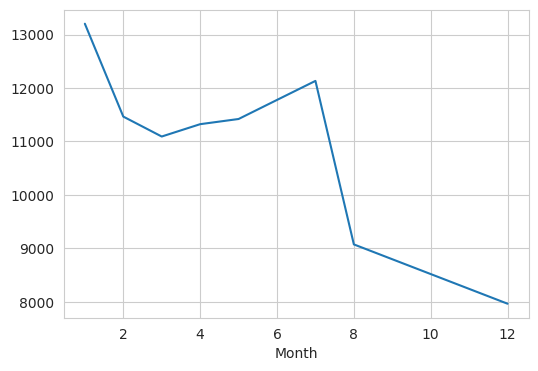

In [ ]:
byMonth['twp'].plot(figsize=(6,4))

In [ ]:
byMonth.reset_index(inplace=True)

[]

<Figure size 400x400 with 0 Axes>

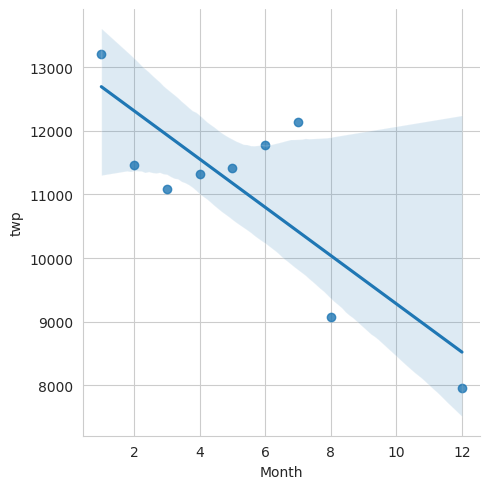

In [ ]:
plt.figure(figsize=(4,4))
sns.lmplot(x='Month', y='twp', data=byMonth)
plt.plot()

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

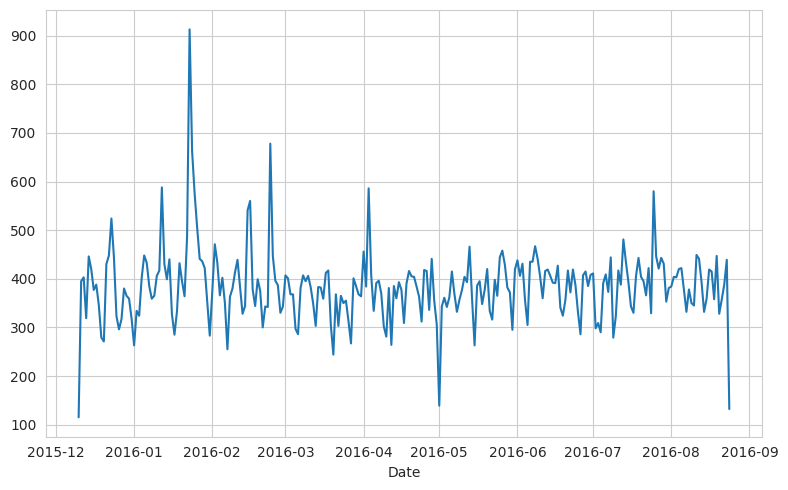

In [ ]:
df.groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

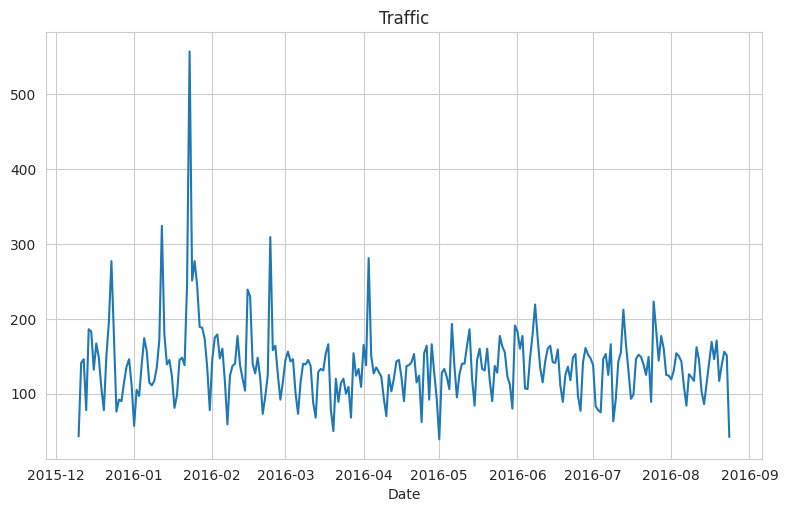

In [ ]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

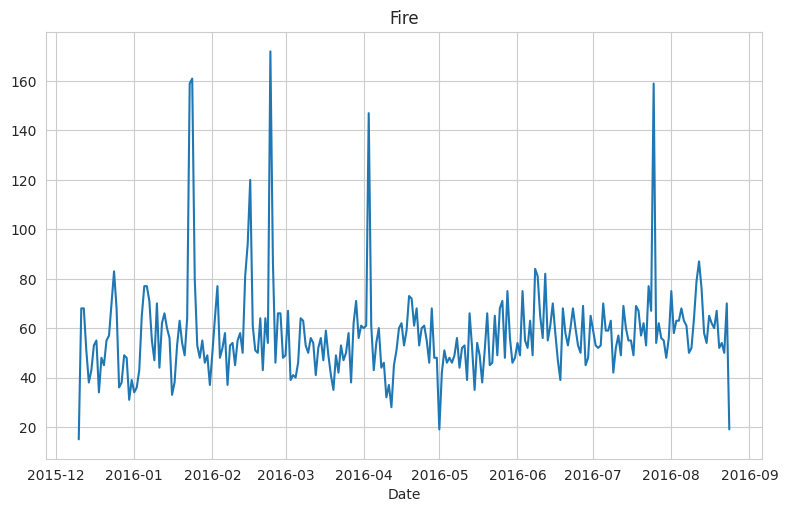

In [ ]:
df[df['Reason']== 'Fire'].groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

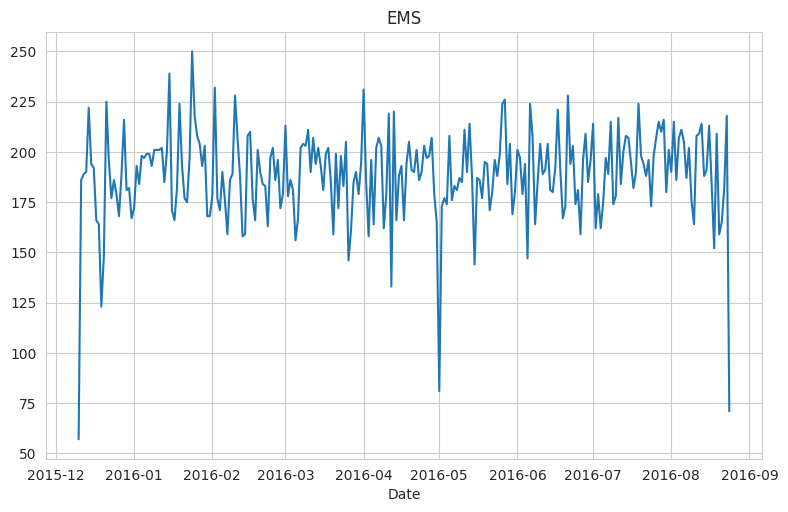

In [ ]:
df[df['Reason']== 'EMS'].groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.tight_layout()
plt.title('EMS')

____
### **Now, to better understand the relationship between days of the week and hours, I'll create a heat map. However, to do this, we need to properly structure our data. I will pivot the data to have columns represent the hours and rows grouped by the days of the week.**

In [ ]:
matrix = df.groupby(['Day of Week', 'Hour']).count()['Date'].unstack(level='Hour')

In [ ]:
matrix.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Text(0.5, 1.0, 'Heatmap of 911 Calls by Day and Hour')

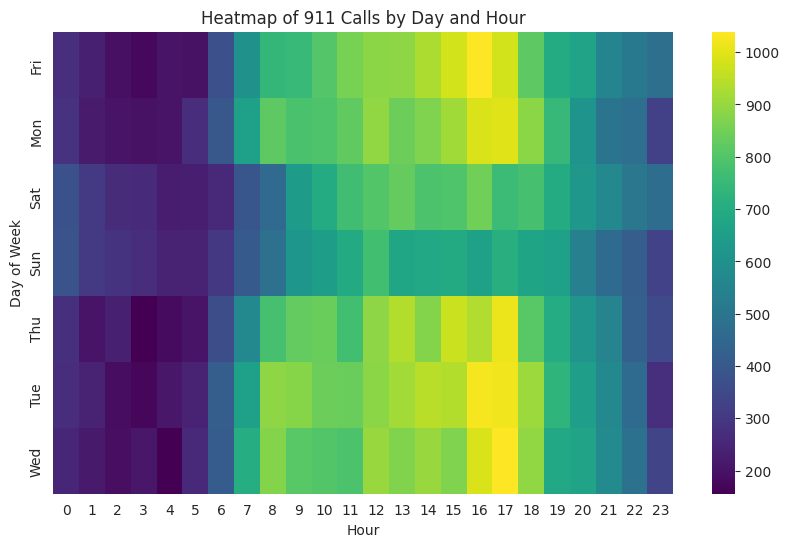

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(matrix, cmap='viridis')
plt.plot()
plt.title('Heatmap of 911 Calls by Day and Hour')


### **This heatmap provides a visual representation of the volume of 911 calls across different hours of the day for each day of the week. The color gradient indicates the intensity of calls, with cooler colors representing fewer calls and warmer colors indicating more calls.**

### **We can observe that the call volume is relatively lower during the early morning hours (midnight to 5 AM), as indicated by the prevalence of cooler colors. The intensity of calls generally begins to increase from mid-morning, with the highest volumes occurring in the mid to late afternoon (around 3 PM to 6 PM), as shown by the yellow to yellow-green shades.**

### **There's a noticeable pattern during weekdays (Monday to Friday) where call volumes peak in the late afternoon. In contrast, weekends (Saturday and Sunday) show a more even distribution of calls throughout the day, with slightly higher volumes in the late evenings.**

### **This kind of heatmap is particularly useful for allocating resources and planning emergency response staffing, as it clearly highlights the times when demand is highest. It also suggests that different strategies may be needed for weekdays versus weekends, given the variation in call patterns.**

### **Now, I will construct and examine a cluster map to discern the patterns between Days of the Week and Hours.**

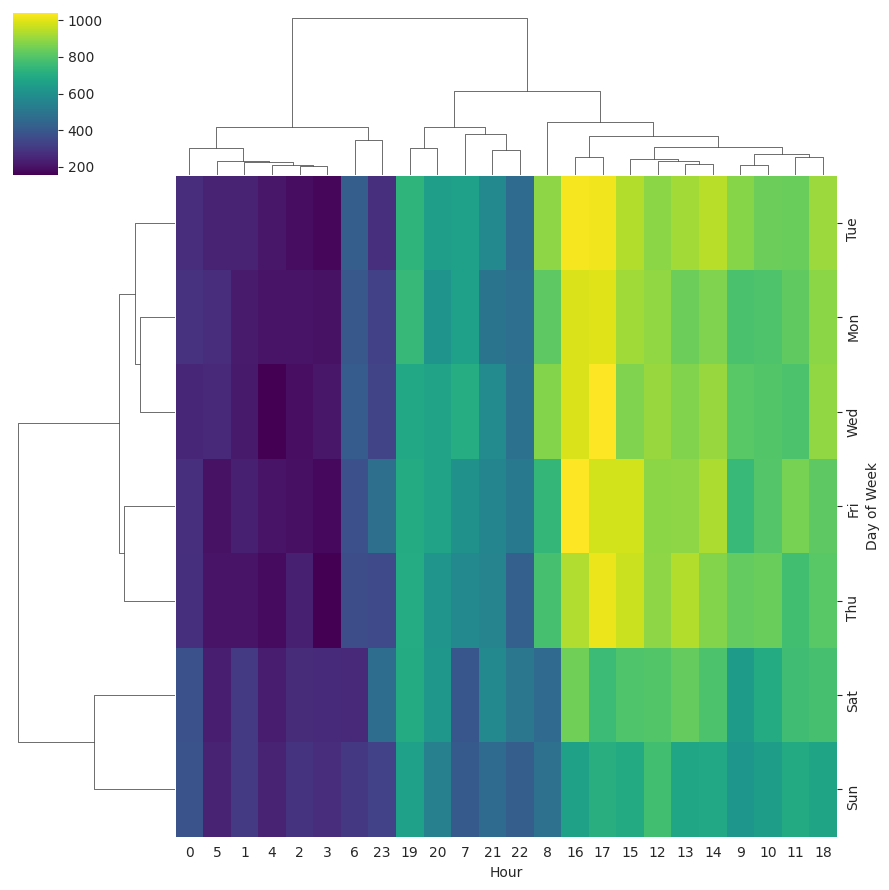

In [ ]:
sns.clustermap(matrix, cmap='viridis',figsize=(9,9))

### **I will repeat the same process for Months**

In [ ]:
matris2 = df.groupby(['Day of Week', 'Month']).count()['Date'].unstack(level='Month')

In [ ]:
matris2.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5, 1.0, 'Heatmap of 911 Calls by Day and Month')

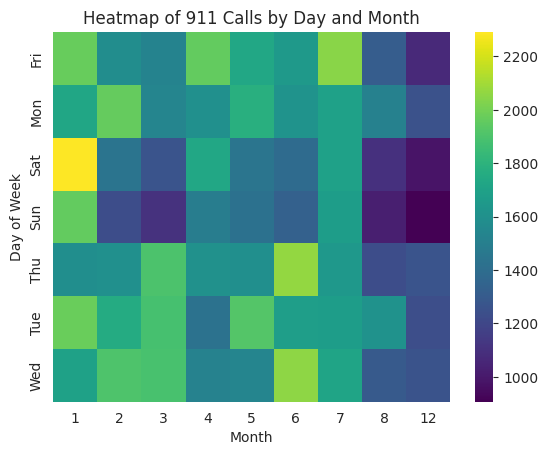

In [ ]:
sns.heatmap(matris2, cmap='viridis')
plt.plot()
plt.title('Heatmap of 911 Calls by Day and Month')

### **This heatmap illustrates the frequency of 911 calls by day of the week and month. The color intensity indicates the call volume, with darker colors representing higher frequencies. Notably, there's a peak in calls on Mondays in January, shown by the yellow block. Overall, call volumes appear relatively higher at the start of the year and on certain weekdays,**

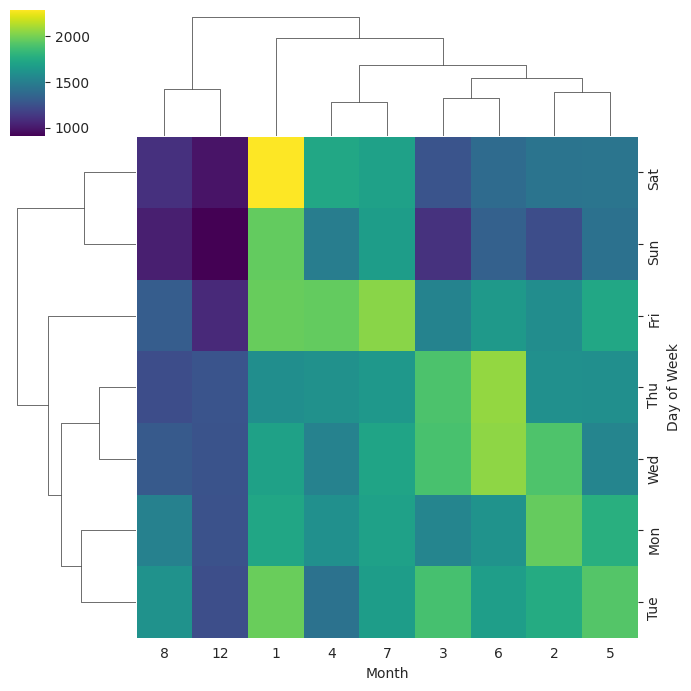

In [ ]:
sns.clustermap(matris2, cmap='viridis', figsize=(7,7))